# C7M5 Notebook 1: Model Evaluation and Refinement

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

%matplotlib inline

In [2]:
df = pd.read_csv("datasets/new_auto.csv", index_col = 0)

In [3]:
df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,horsepower,peak_rpm,city_kmpl,highway_kmpl,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,13495.0,False,True,True,False,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,8.93,11.48,16500.0,False,True,True,False,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,8.08,11.05,16500.0,False,True,True,False,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,10.20,12.76,13950.0,False,True,True,False,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,7.65,9.35,17450.0,False,True,True,False,low


In [4]:
df = df._get_numeric_data()
df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_kmpl,highway_kmpl,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo
0,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,8.93,11.48,13495.0,False,True,True,False
1,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,8.93,11.48,16500.0,False,True,True,False
2,1,122.0,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154.0,5000.0,8.08,11.05,16500.0,False,True,True,False
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102.0,5500.0,10.20,12.76,13950.0,False,True,True,False
4,2,164.0,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115.0,5500.0,7.65,9.35,17450.0,False,True,True,False


In [5]:
# functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, fill = True, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, fill = True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()


def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1:  Training and Testing

In [6]:
y_data = df["price"]

In [7]:
x_data = df.drop("price", axis = 1)

In [8]:
# splitting data using train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10,  random_state = 1)

print(f"number of test samples: {x_test.shape[0]}")
print(f"number of training samples: {x_train.shape[0]}")

number of test samples: 21
number of training samples: 180


In [9]:
#linear Regrerssion model
lre = LinearRegression()
lre.fit(x_train[["horsepower"]], y_train) #training on test data

#calcualting r**2 on the training data
print("r^2 for training data: ",lre.score(x_train[["horsepower"]], y_train))
#calcualting r**2 on the test data
print("r^2 for testing data: ", lre.score(x_test[["horsepower"]], y_test))

r^2 for training data:  0.6619724197515104
r^2 for testing data:  0.36358755750788263


We could see that r^2 value is much smaller for test data compared to  training data

### Cross validation Score

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
# parameter cv determins the number of folds
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [12]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [13]:
# using negative mean square error as a score
# using abs as default result contains negative values
abs(cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 4, scoring = "neg_mean_squared_error")) 

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.7224759 ])

In [14]:
# using cross_val_predict
from sklearn.model_selection import cross_val_predict

In [15]:
y_hat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv = 4)
y_hat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

----------------
## Part 2: Overfitting, Underfitting and Model Selection

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


In [16]:
# Linear regression with multiple variable
lr = LinearRegression()
lr.fit(x_train[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]], y_train)

#predicting using training data
y_hat_train = lr.predict(x_train[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
print(f"top 5 preditions using training data: {y_hat_train[0:5]}")

#predicting using testing data
y_hat_test = lr.predict(x_test[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
print(f"top 5 predictions using testing data: {y_hat_test[0:5]}")

top 5 preditions using training data: [ 7426.8952313  28323.63461416 14213.35639399  4052.23183721
 34500.35743576]
top 5 predictions using testing data: [11349.4772496   5884.1648495  11208.948359    6641.3002526
 15566.04458756]


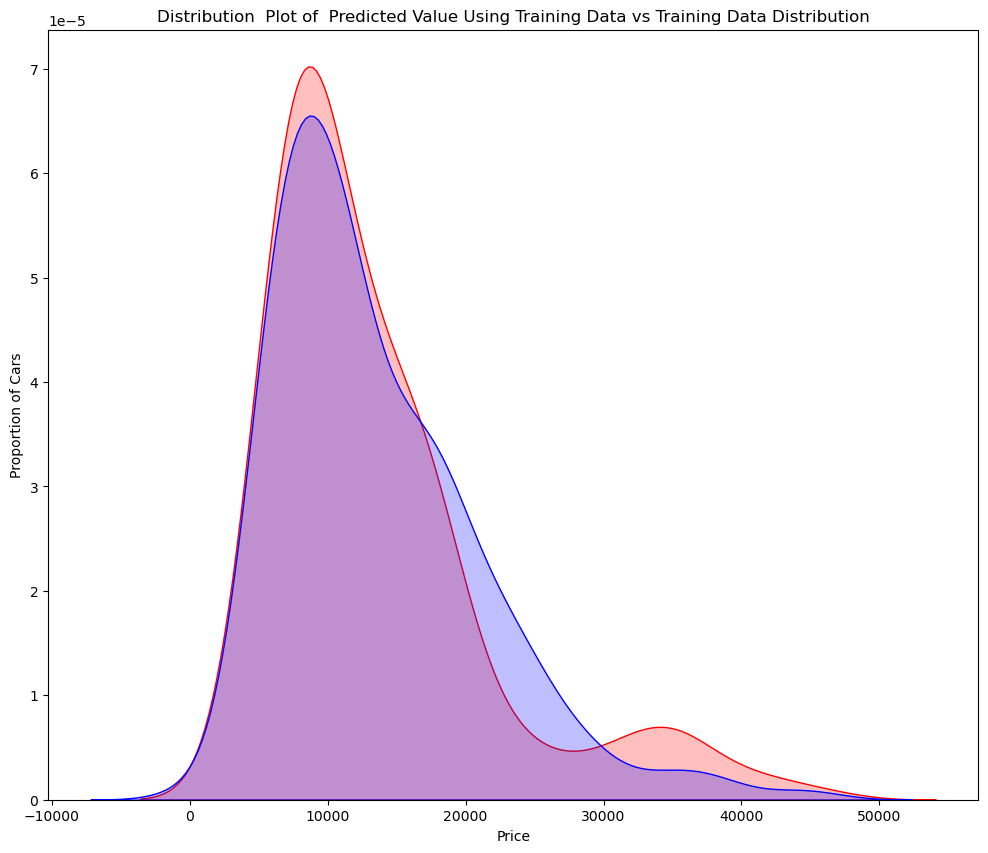

In [17]:
# distribuition of predicted values over training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


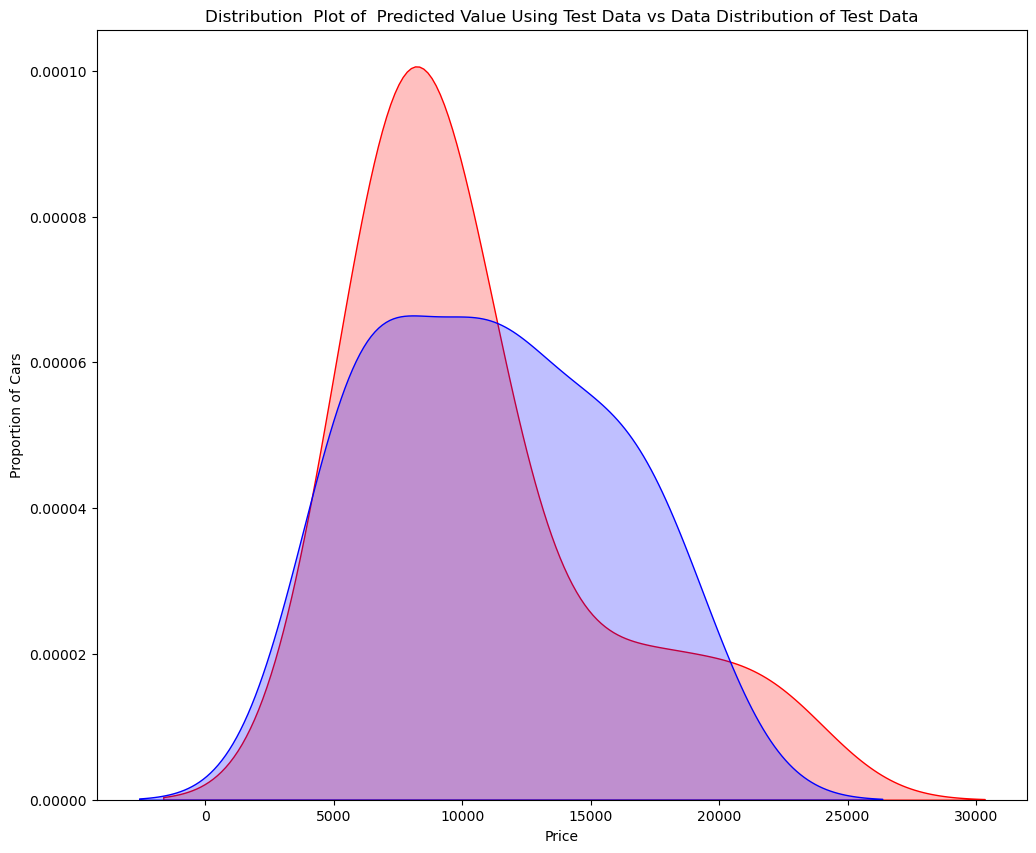

In [18]:
# distribuition of predicted values over testing data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [19]:
#from sklearn.preprocessing import PolynomialFeatures

### Overfittig

<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


In [20]:
# using 55% data for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# degree 5 polynomial transformation
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])

#applying polynomial regression
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
y_hat_train = poly.predict(x_train_pr)  #running model on training set
print(f"top 5 preditions using training data: {y_hat_train[0:5]}")

t_hat_test = poly.predict(x_test_pr)  #running model on testing set
print(f"top 5 preditions using testing data: {y_hat_test[0:5]}")

top 5 preditions using training data: [13157.88238897 21890.93444238  6409.50734373 21231.8552508
  7905.2453394 ]
top 5 preditions using testing data: [11349.4772496   5884.1648495  11208.948359    6641.3002526
 15566.04458756]


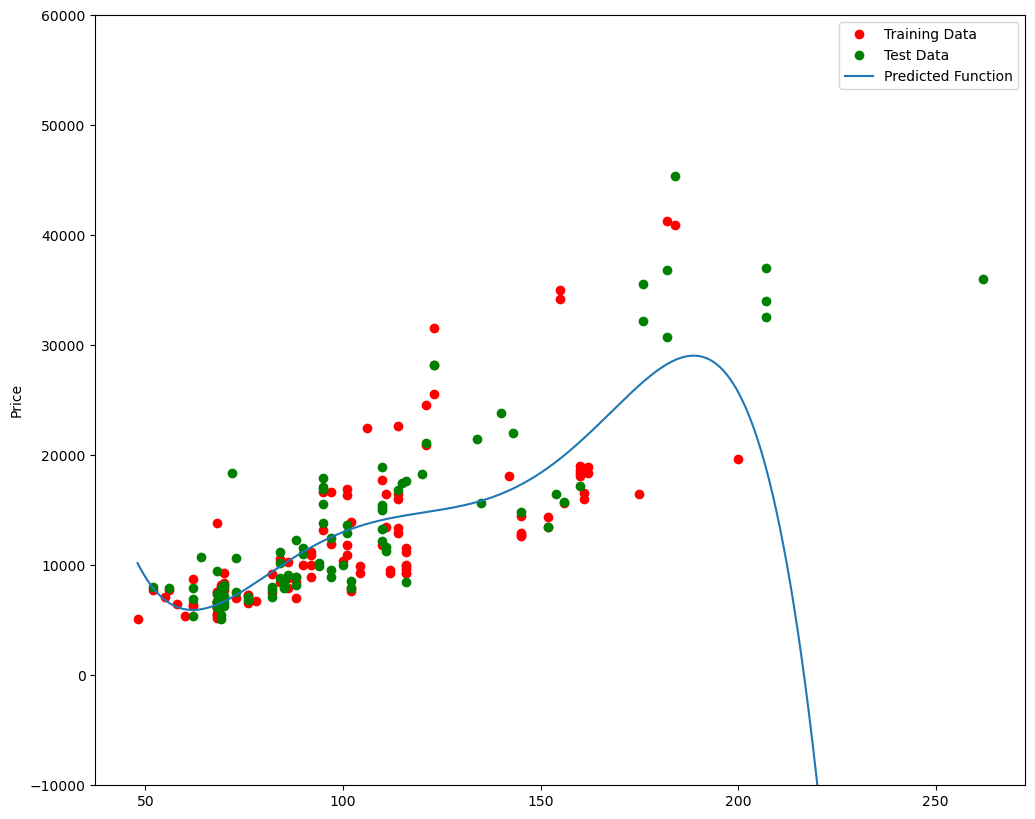

In [21]:
#Visualization using polyplot
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


In [22]:
#calcualting r**2 on the training data
print("r^2 for training data: ",poly.score(x_train_pr, y_train))
#calcualting r**2 on the test data
print("r^2 for testing data: ", poly.score(x_test_pr, y_test))

r^2 for training data:  0.5567716897727109
r^2 for testing data:  -29.870994900857237


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Text(3, 0.75, 'maximum R^2')

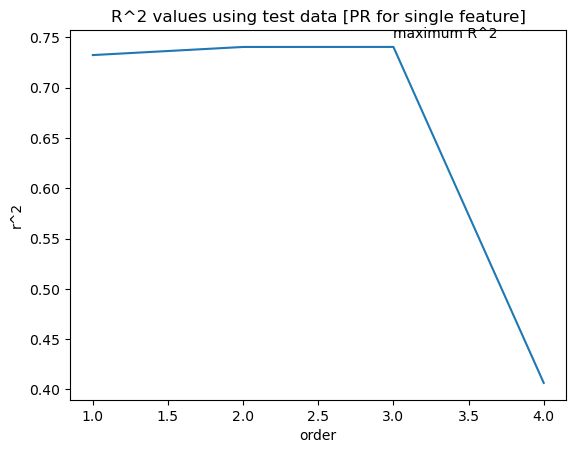

In [23]:
# Important code
# Running model on multiple orders
# Polynomial Regression with one feature

r_square_test = []
order = [i for i in range (1, 5)]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])

    lr = LinearRegression()
    lr.fit(x_train_pr, y_train)

    r_square_test.append(lr.score(x_test_pr,  y_test))

plt.plot(order, r_square_test)
plt.xlabel("order")
plt.ylabel("r^2")
plt.title("R^2 values using test data [PR for single feature]")
plt.text(3, 0.75, "maximum R^2")

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


5 features were created for order 1
15 features were created for order 2
35 features were created for order 3
70 features were created for order 4
126 features were created for order 5
210 features were created for order 6
330 features were created for order 7
495 features were created for order 8
715 features were created for order 9
1001 features were created for order 10

r^2 values are as follows:
[0.7843722666312345, 0.6044018824200152, -25.470457690419675, -1505.070463538306, -401.1346673723382, -932.2675556664287, -212250.04380727367, -49916.11972976031, -142940.68441339355, -441031.28480729915]


Text(0.5, 1.0, 'R^2 values using test data [PR for multiple features]')

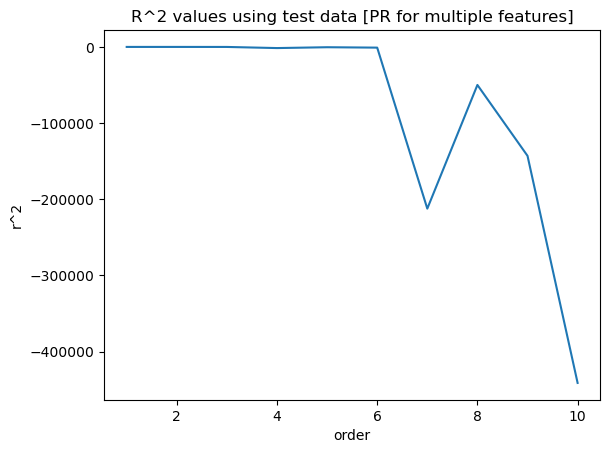

In [24]:
# Running model on multiple orders
# Polynomial Regression with multiple feature

r_square_test = []
order = [i for i in range (1, 11)]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
    x_test_pr = pr. fit_transform(x_test[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
    print(f"{x_train_pr.shape[1]} features were created for order {n}")
    lr = LinearRegression()
    lr.fit(x_train_pr,y_train)
    r_square_test.append(lr.score(x_test_pr, y_test))

print(f"\nr^2 values are as follows:\n{r_square_test}")

plt.plot(order, r_square_test)
plt.xlabel("order")
plt.ylabel("r^2")
plt.title("R^2 values using test data [PR for multiple features]")
#plt.text(3, 0.75, "maximum R^2")

[ 6300.97783208 10400.89403593 20510.51385446 19276.46699037
 20555.82234244]


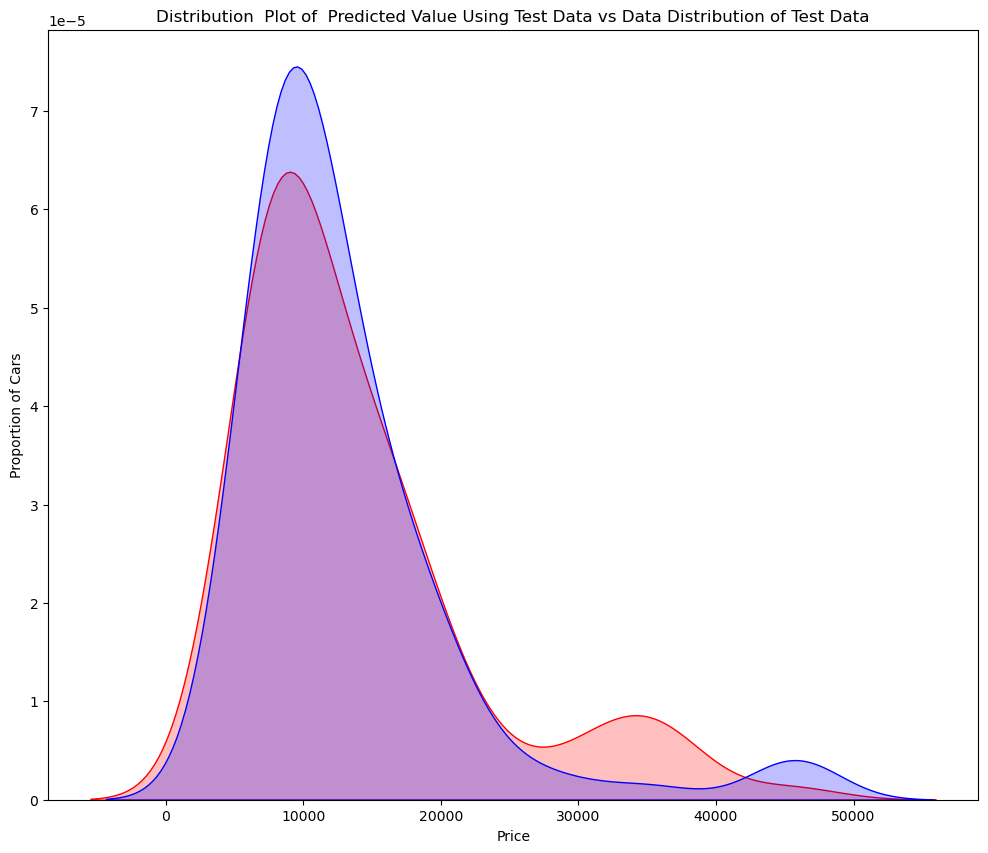

In [25]:
"""
r^2 has highest value at degree 1. means Polynomial regression of order 1 aka Linear regression gives the best prediction
"""
# distribuition plot for degree 2
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
x_test_pr = pr. fit_transform(x_test[["horsepower", "curb_weight", "engine_size", "highway_kmpl"]])
lr = LinearRegression()
lr.fit(x_train_pr,y_train)

y_hat_test = lr.predict(x_test_pr)
print(y_hat_test[0:5])

title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, y_hat_test, "Actual Values(test)", "Predicted Values(test)", title)

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

## Part 3: Ridge Regression
In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


In [26]:
from sklearn.linear_model import Ridge

In [27]:
# Polynomial Ridge Regression with multiple feature
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])
x_test_pr = pr. fit_transform(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])

ridge_model = Ridge(alpha = 1)
ridge_model.fit(x_train_pr, y_train)    # training on training data

y_hat = ridge_model.predict(x_test_pr)   # testing on test data

print(f"top 5  values of testing data: {y_test[0:5].values}")
print(f"top 5 preditions using ridge regression: {y_hat[0:5]}")

top 5  values of testing data: [ 6295. 10698. 13860. 13499. 15750.]
top 5 preditions using ridge regression: [ 6592.93061086  9661.49182807 20991.09723749 19411.50603448
 21381.25618284]


as you can see when we used alpha = 1, we did not get proper results. Here value of coefficients are getting quiet high. to solve this issue, I have to selet appropriate value of alpha. following code is for that purpose.

In [28]:
from tqdm import tqdm

pr=PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])
x_test_pr = pr. fit_transform(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])

r_square_test = []
r_square_train  = []
dummy = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    rm = Ridge(alpha = alpha)
    rm.fit(x_train_pr, y_train)
    test_score = rm.score(x_test_pr, y_test)
    train_score = rm.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    r_square_test.append(test_score)
    r_square_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 151.59it/s, Test Score=0.568, Train Score=0.859]


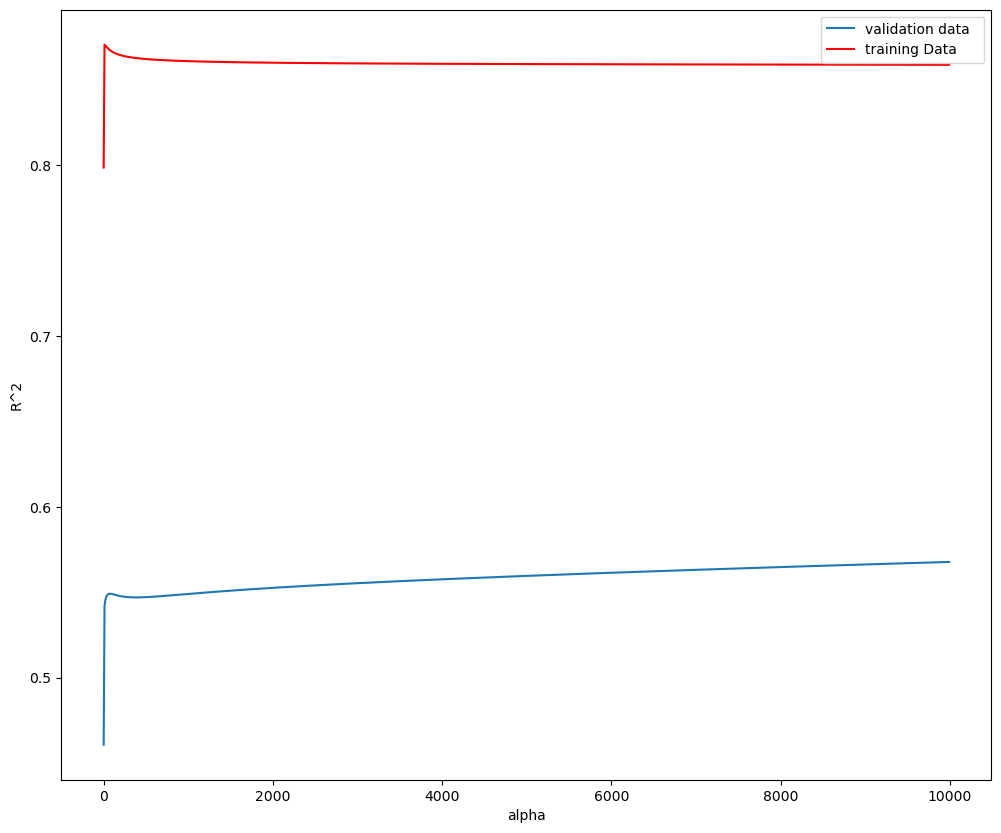

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,r_square_test, label='validation data  ')
plt.plot(Alpha,r_square_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in figure represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


In [30]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])
x_test_pr = pr. fit_transform(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl','normalized_losses','symboling']])

ridge_model = Ridge(alpha = 10)
ridge_model.fit(x_train_pr, y_train)    # training on training data

y_hat = ridge_model.predict(x_test_pr)   # testing on test data

print(f"top 5  values of testing data: {y_test[0:5].values}")
print(f"top 5 preditions using ridge regression: {y_hat[0:5]}")

top 5  values of testing data: [ 6295. 10698. 13860. 13499. 15750.]
top 5 preditions using ridge regression: [ 6473.84654224  9536.09874926 21070.54264466 19751.17625173
 21338.6565062 ]


-----------
## Part 4:  Grid  Search
The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameters = [{"alpha":[0.001, 0.01, 1, 10, 100, 1000, 10000, 100000]}]

rr= Ridge()  # Ridge regression model

grid = GridSearchCV(rr,parameters,cv = 4)  # ridge grid search object
grid.fit(x_data[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [33]:
best_rr = grid.best_estimator_
best_rr

Ridge(alpha=10000)

In [34]:
best_rr.score(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_kmpl']], y_test)

0.8411197987684297

--------------
Thank You!